In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import scanpy as sc
import os
import enlighten
import pandas as pd
import glob

import scanpy as sc 
import sys 
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import glob
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import random
warnings.filterwarnings('ignore')
sys.path.append('../../../src')

/ihome/djishnu/alw399/.local/lib/python3.9/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-07-01 12:10:36.602333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-01 12:10:37.036602: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LI

In [3]:
from spaceoracle.oracles import BaseTravLR
from spaceoracle.plotting.cartography import Cartography

In [4]:
adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/snrna_human_tonsil.h5ad')

del adata.uns['received_ligands']
del adata.uns['received_ligands_tfl']

adata.uns['cell_thresholds'] = pd.DataFrame(
    index=adata.obs.index, 
    columns=adata.var_names).fillna(1)

adata

AnnData object with n_obs × n_vars = 5778 × 3333
    obs: 'cell_type', 'author_cell_type', 'cell_type_int', 'banksy_celltypes', 'cell_type_2'
    uns: 'cell_thresholds', 'cell_type_int_colors'
    obsm: 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count'

In [5]:
# adata.obs = adata.obs.join(pd.read_csv('/ix3/djishnu/alw399/SpaceOracle/notebooks/human_tonsil/tonsil_cell_types.csv', index_col=0))

In [6]:
import random
from spaceoracle.virtual_tissue import VirtualTissue

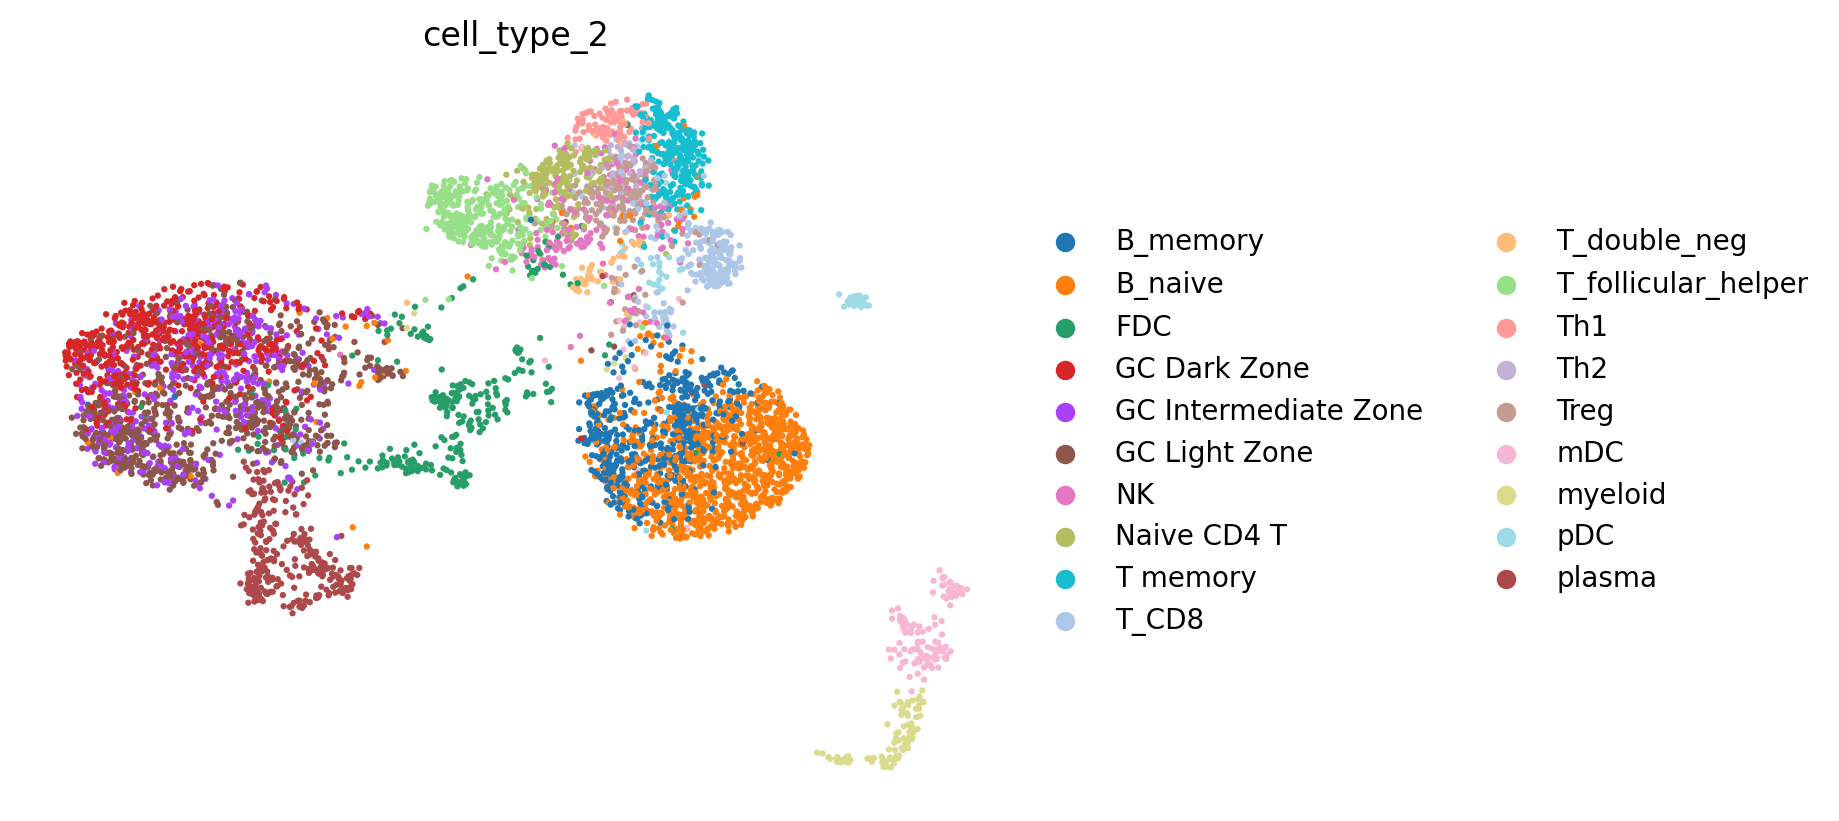

In [7]:
adata.obsm['X_umap'] = pd.read_csv('/ix3/djishnu/alw399/SpaceOracle/notebooks/human_tonsil/umap.csv', index_col=0).values
sc.pl.umap(adata, color=['cell_type_2'], frameon=False)

In [8]:
tonsil = VirtualTissue(
    adata = adata,
    annot = 'cell_type_2',
    betadatas_path = '/ix/djishnu/shared/djishnu_kor11/scGPT_runs/tonsil',
    ko_path = '/ix/djishnu/shared/djishnu_kor11/genome_screens/human_tonsil_scGPT'
)

In [ ]:
genes=[['PAX5', 'BCL6', 'FOXP3', 'GATA3', 'PRDM1', 'FOXO1'], 
        ['PDCD1','IL7R', 'CXCR5', 'CXCR4', 'CCR2'],
        ['IL7', 'GZMA', 'IL10', 'IL6ST', 'IL4', 'LGALS9']]
# genes = sum(genes, [])
len(genes)

17

In [ ]:
tonsil.compute_ko_impact(genes, force_recompute=True)

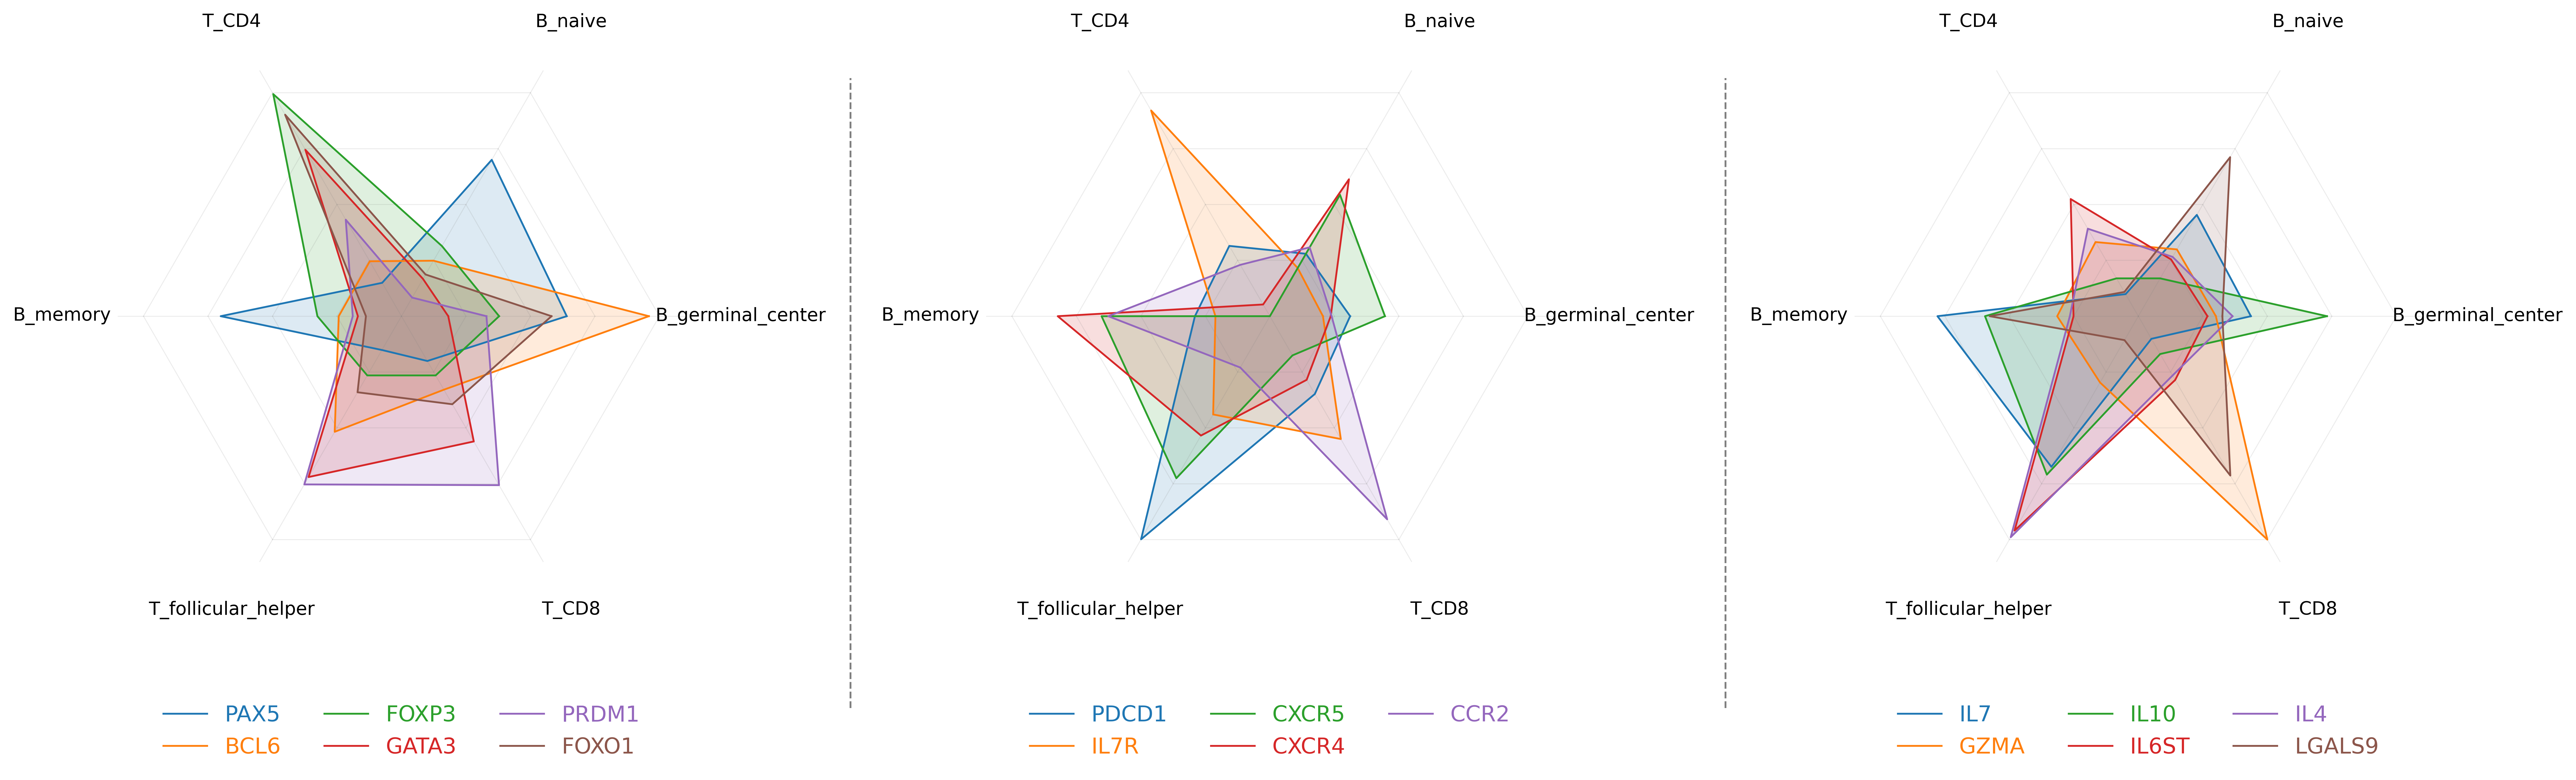

In [14]:
tonsil.plot_radar(genes=[['PAX5', 'BCL6', 'FOXP3', 'GATA3', 'PRDM1', 'FOXO1'], 
                         ['PDCD1','IL7R', 'CXCR5', 'CXCR4', 'CCR2'],
                         ['IL7', 'GZMA', 'IL10', 'IL6ST', 'IL4', 'LGALS9']], 
    show_for=['B_germinal_center', 'B_naive', 'T_CD4', 
    'B_memory', 'T_follicular_helper', 'T_CD8'])

plt.savefig('tonsil_scGPT_radar.svg', dpi=300, bbox_inches='tight', transparent=True, format='svg')

In [8]:
adata.obs['cell_type_major'] = adata.obs.cell_type_2.replace(
    {
        'GC Dark Zone': 'Germinal Center B cells', 
        'GC Light Zone': 'Germinal Center B cells', 
        'GC Intermediate Zone': 'Germinal Center B cells', 
        'plasma': 'Plasma cells', 
        'B_naive': 'B cells', 
        'B_memory': 'B cells', 
        'B_germinal_center': 'Germinal Center B cells', 
        'Naive CD4 T': 'T cells', 
        'Treg': 'T cells', 
        'T memory': 'T cells', 
        'Th1': 'T cells', 
        'Th2': 'T cells', 
        'T_CD8': 'T cells', 
        'T_follicular_helper': 'T cells', 
        'mDC': 'Dendritic cells', 
        'FDC': 'Dendritic cells', 
        'myeloid': 'Myeloid cells', 
        'NK': 'NK cells', 
        'pDC': 'Dendritic cells', 
        'T_double_neg': 'T cells'
    }
)

In [9]:
color_dict = {
    'GC Dark Zone': "#f14e13",
    'GC Light Zone': "#0feca9",
    'GC Intermediate Zone':  "#4492e0",
    'plasma': "#61c17c",
    'B_naive': "#308f0e", 
    'B_memory': "#beb637",
    'B_germinal_center': "#8995cf",
    'Naive CD4 T': "#f721b7",
    'Treg': "#ecc91d",
    'T memory': "#49f12f",
    'Th1': "#c43cf2",
    'Th2': "#5e6ff3",
    'T_CD8': "#dd3652",
    'T_CD4': "#2b07f6",
    'T_follicular_helper': "#e28723",
    'mDC': "#a5a29e", 
    'FDC': "#a5a29e", 
    'myeloid': "#a5a29e", 
    'NK': "#a5a29e", 
    'pDC': "#a5a29e", 
    'T_double_neg': "#a5a29e",
    'Germinal Center B cells': "#6295cd",
    'Plasma cells': "#58a862",
    'T cells': "#cc5343",
    'B cells': "#9865c8",
    'Dendritic cells': "#9da13c",
    'Myeloid cells': "#f3c009",
    'NK cells': "#a36e29",
}

In [10]:
tonsil = VirtualTissue(
    adata = adata,
    annot = 'cell_type_2',
    betadatas_path = '/ix/djishnu/shared/djishnu_kor11/scGPT_runs/tonsil',
    ko_path = '/ix/djishnu/shared/djishnu_kor11/genome_screens/human_tonsil_scGPT',
    color_dict=color_dict
)

In [11]:
from spaceoracle.models.parallel_estimators import create_spatial_features

spf = create_spatial_features(
    x=adata.obsm['spatial'][:, 0], 
    y=adata.obsm['spatial'][:, 1], 
    celltypes=adata.obs.cell_type_2, 
    obs_index=adata.obs_names, 
    radius=100
)

cell_groups = {
    'GC B Cells': ['GC Light Zone', 'GC Dark Zone', 'GC Intermediate Zone'],
    'B cells': ['GC Light Zone', 'GC Dark Zone', 'GC Intermediate Zone', 'B_naive', 'B_memory'],
    # 'T cells': ['Naive CD4 T', 'T_follicular_helper', 'Th2', 'Th1', 'Treg'],
    'T cells': ['T_follicular_helper'],
}

In [12]:
from scipy.stats import pearsonr

from spaceoracle.plotting.cartography import xy_from_adata

xy = xy_from_adata(adata)


dict_keys(['GC B Cells', 'B cells', 'T cells'])


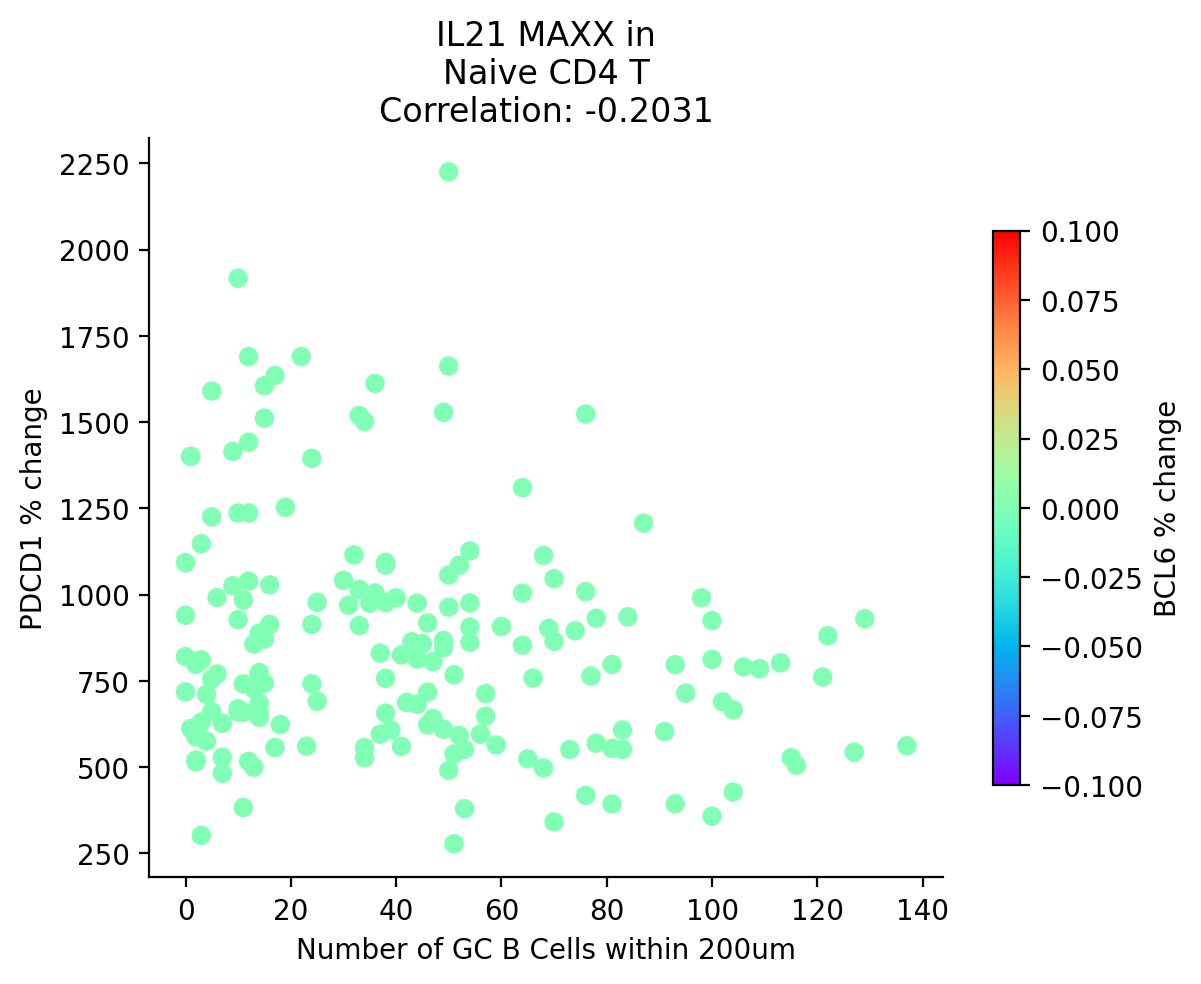

In [13]:
ax, datadf = plot_gene_vs_proximity(
    perturb_target='IL21', 
    proximity_cell='GC B Cells',
    # gene='GATA3', 
    gene='PDCD1',
    color_gene='BCL6', 
    cell_filter='Naive CD4 T', 
    # cell_filter='T_follicular_helper', 
    # cell_filter='GC Dark Zone', 
    mode='maxx',
    # mode='ko',
    ko_path='/ix/djishnu/shared/djishnu_kor11/genome_screens/human_tonsil_scGPT'
    
)
plt.savefig('human_tonsil_scGPT_IL21_4n_maxx_PDCD1_vs_BCL6.svg', dpi=300, bbox_inches='tight', transparent=True, format='svg')
plt.show()

dict_keys(['GC B Cells', 'B cells', 'T cells'])


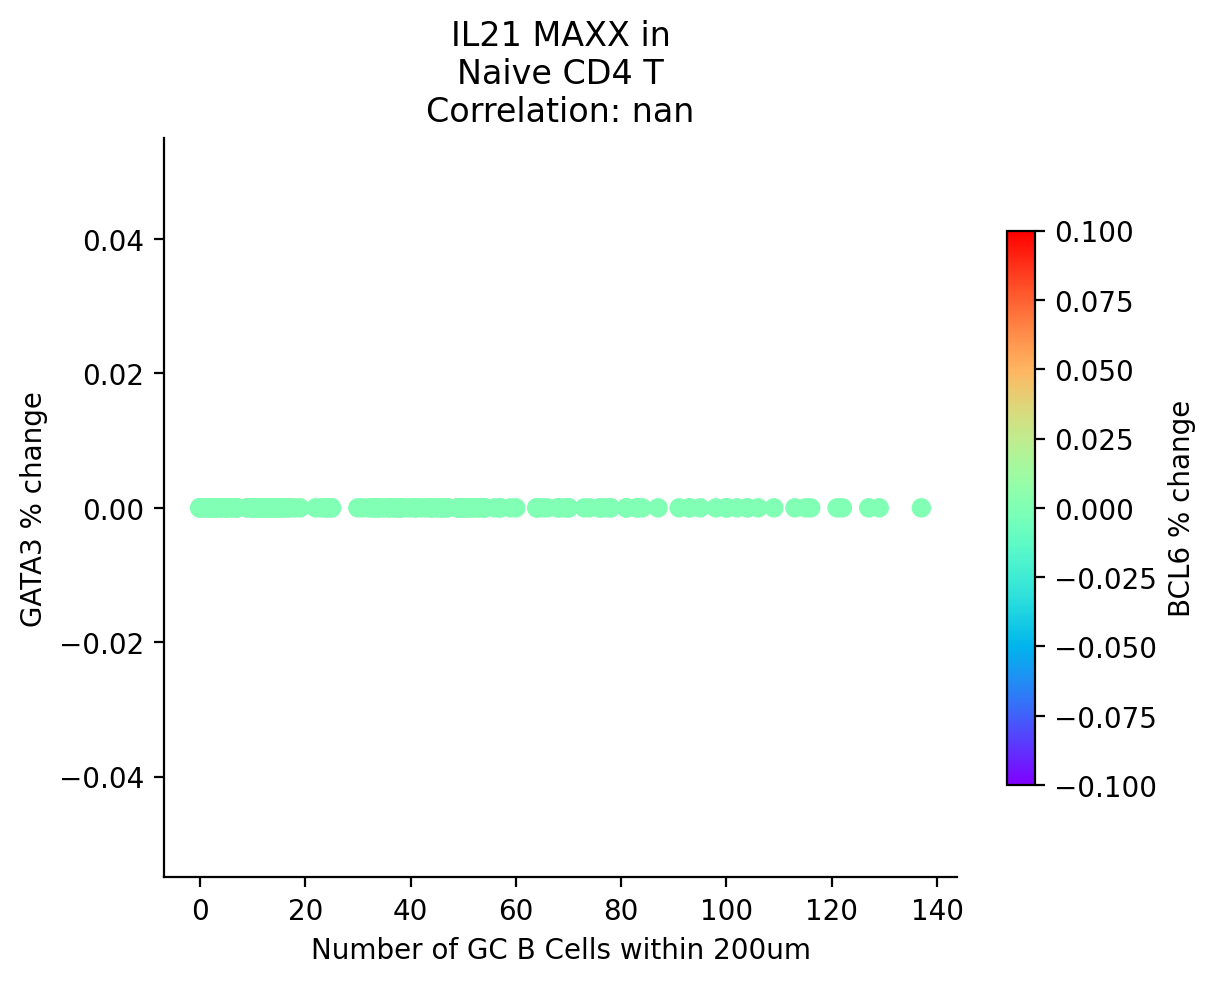

In [14]:
ax, datadf = plot_gene_vs_proximity(
    perturb_target='IL21', 
    proximity_cell='GC B Cells',
    gene='GATA3', 
    # gene='PDCD1',
    color_gene='BCL6', 
    cell_filter='Naive CD4 T', 
    # cell_filter='T_follicular_helper', 
    # cell_filter='GC Dark Zone', 
    mode='maxx',
    # mode='ko',
    ko_path='/ix/djishnu/shared/djishnu_kor11/genome_screens/human_tonsil_scGPT'
    
)
plt.savefig('human_tonsil_scGPT_IL21_4n_maxx_GATA3_vs_BCL6.svg', dpi=300, bbox_inches='tight', transparent=True, format='svg')
plt.show()

In [ ]:
stop

In [18]:
atmp = adata.copy()

In [19]:
dfx = datadf[['AICDA']]
dfx.columns = ['AICDA_change']

In [20]:
atmp.obs = atmp.obs.join(dfx[['AICDA_change']])

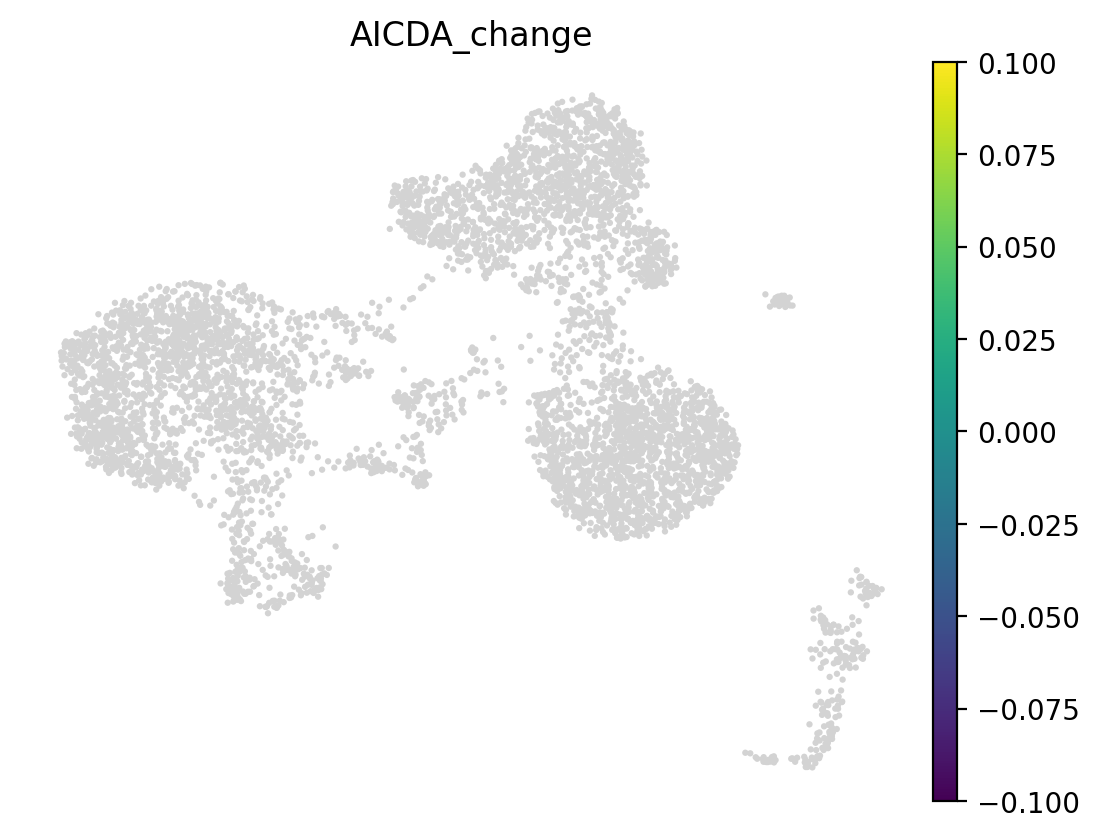

In [21]:
sc.pl.umap(atmp, color=['AICDA_change'], frameon=False)

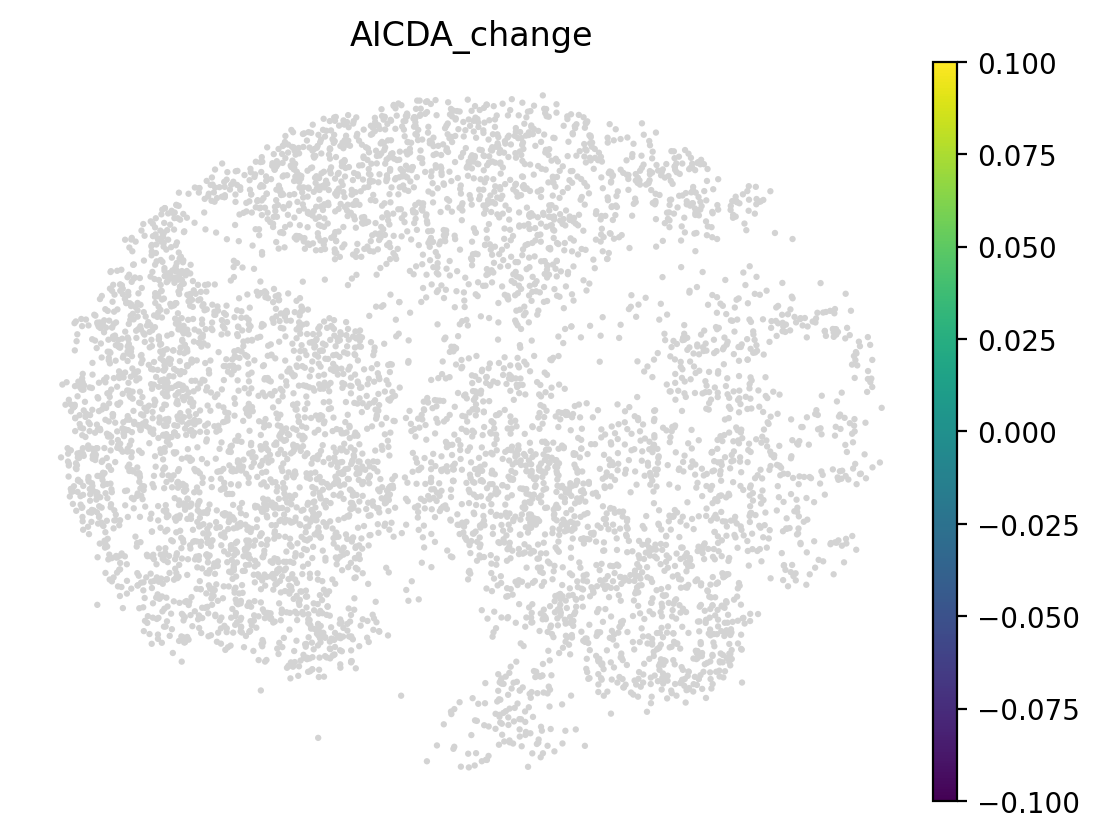

In [22]:
sc.pl.embedding(atmp, color=['AICDA_change'], frameon=False, basis='spatial')

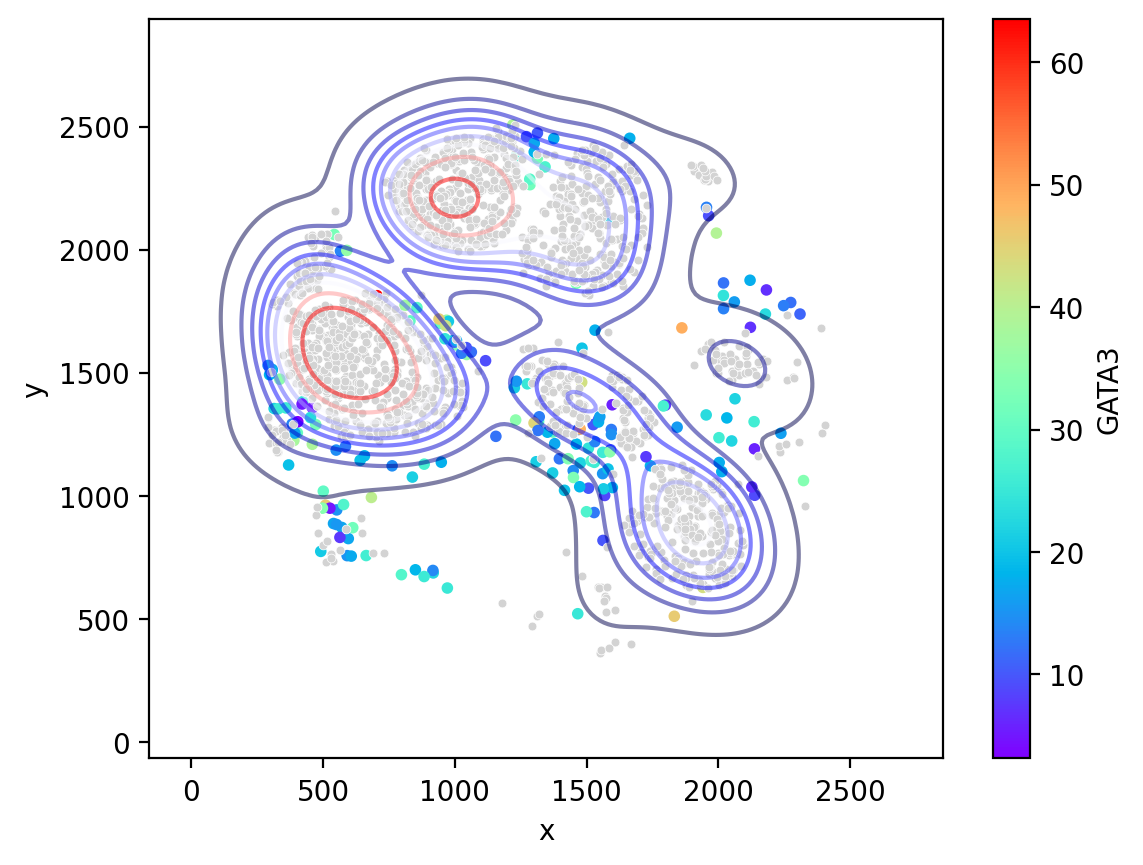

In [23]:
scatter = plt.scatter(
    datadf.x, 
    datadf.y,
    c=datadf.GATA3,
    cmap='rainbow',
    s=10
)
plt.colorbar(scatter, label='GATA3')

# Plot scatter points
sns.scatterplot(
    data = adata.obs.join(xy).query('cell_type_2.isin(["GC Light Zone", "GC Dark Zone", "GC Intermediate Zone"])'),
    x='x', y='y', color='lightgrey', s=10
)

# Add density contours
sns.kdeplot(
    data = adata.obs.join(xy).query('cell_type_2.isin(["GC Light Zone", "GC Dark Zone", "GC Intermediate Zone"])'),
    x='x', y='y',
    levels=10,
    cmap='seismic',
    alpha=0.5
)
plt.show()

In [24]:
atmp = adata[~adata.obs.index.isin(adata.obs.iloc[[2250, 2593, 3255, 5281]].index)]
# atmp = adata[pd.read_csv('GC_selection.csv', index_col=0).index]

tonsil.init_cartography(atmp, 
    restrict_to=[
        'Naive CD4 T',
        'T_follicular_helper', 
        'Th2', 
        'Th1', 
        'Treg',
        'T_CD8',
        
        'T memory',
         
        'GC Light Zone',
        'GC Dark Zone',
        'GC Intermediate Zone',
        'B_naive',
        'B_memory',
        'plasma'
        
    ]
)

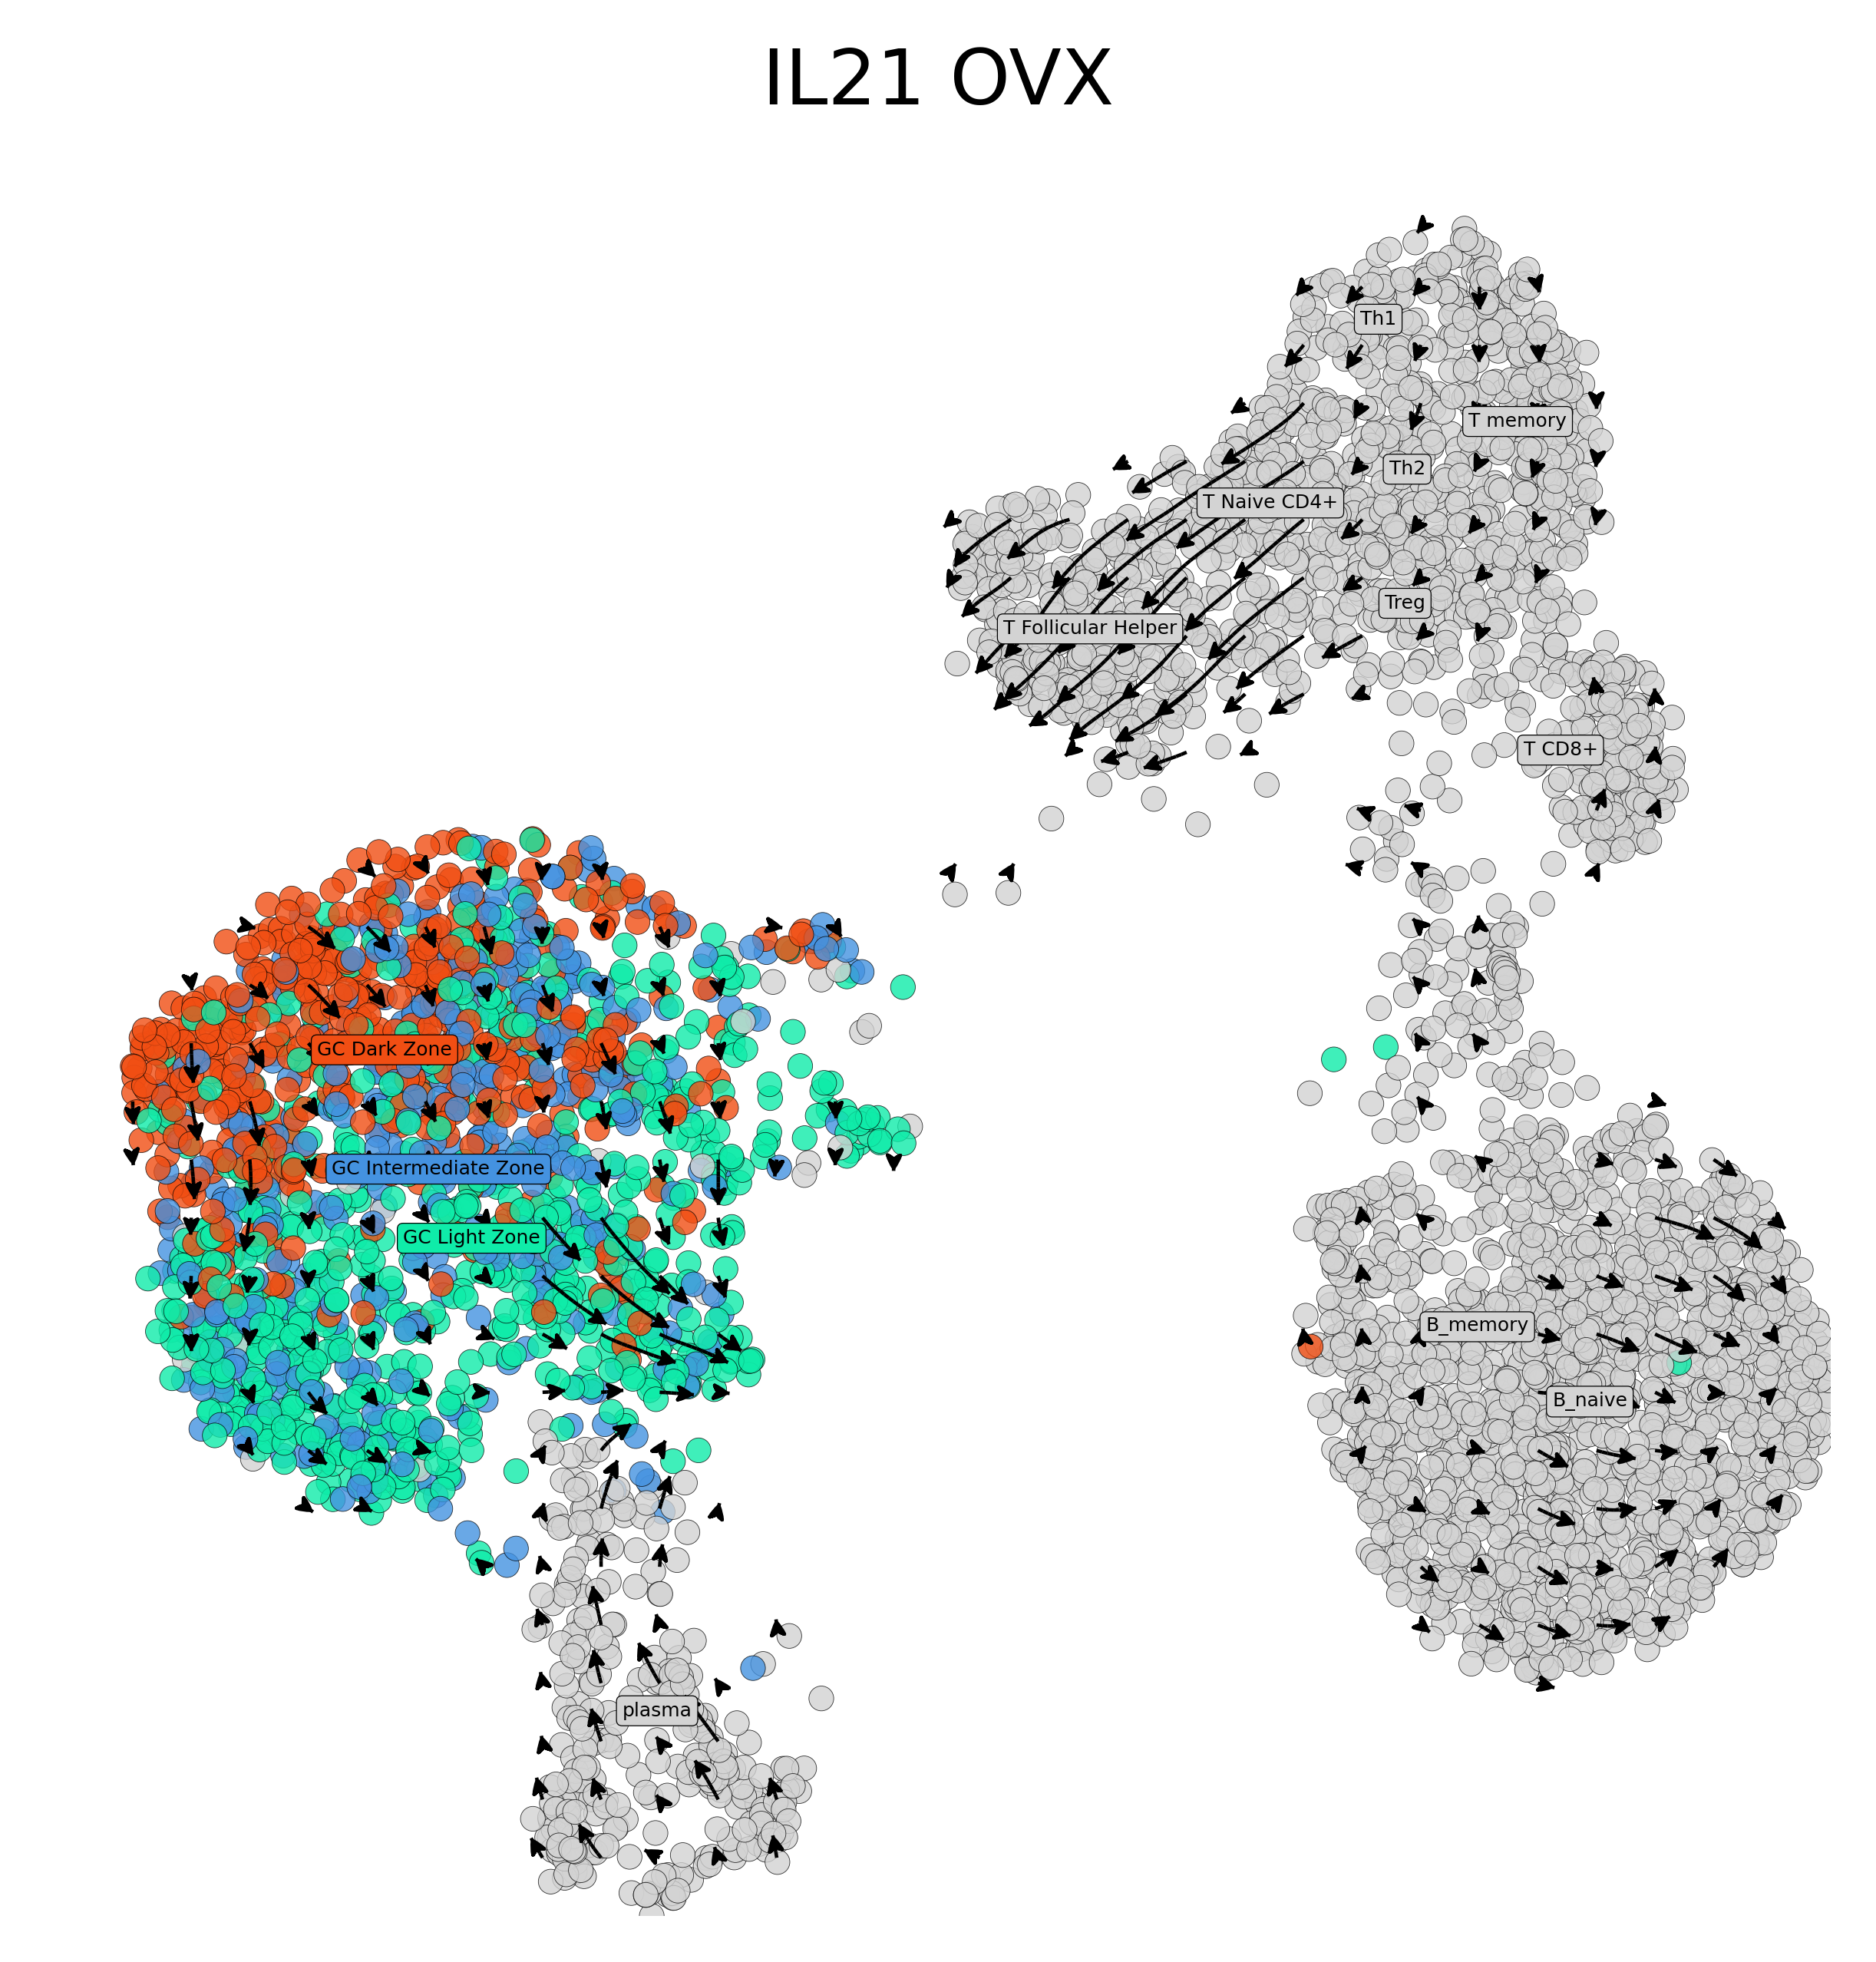

In [25]:
tonsil.plot_arrows(
    perturb_target='IL21', 
    mode='max',
    hue='cell_type_2',
    curve=True,
    vector_scale=1, 
    grid_scale=2,
    n_neighbors=200,
    scale=5, 
    grains=30,
    scatter_size=15,
    legend_fontsize=3,
    rename={
        'T_follicular_helper': 'T Follicular Helper',
        'T_CD8': 'T CD8+',
        'Naive CD4 T': 'T Naive CD4+',
    },
    highlight_clusters=[
        # 'Naive CD4 T',
        # 'T_follicular_helper', 
        # 'Th2', 
        # 'Th1', 
        # 'Treg',
        # 'T_CD8',
        'GC Light Zone',
        'GC Dark Zone',
        'GC Intermediate Zone',
        # 'B_memory',
        # 'B_naive',
        # 'plasma'
    ]
)

plt.title('IL21 OVX')
plt.show()

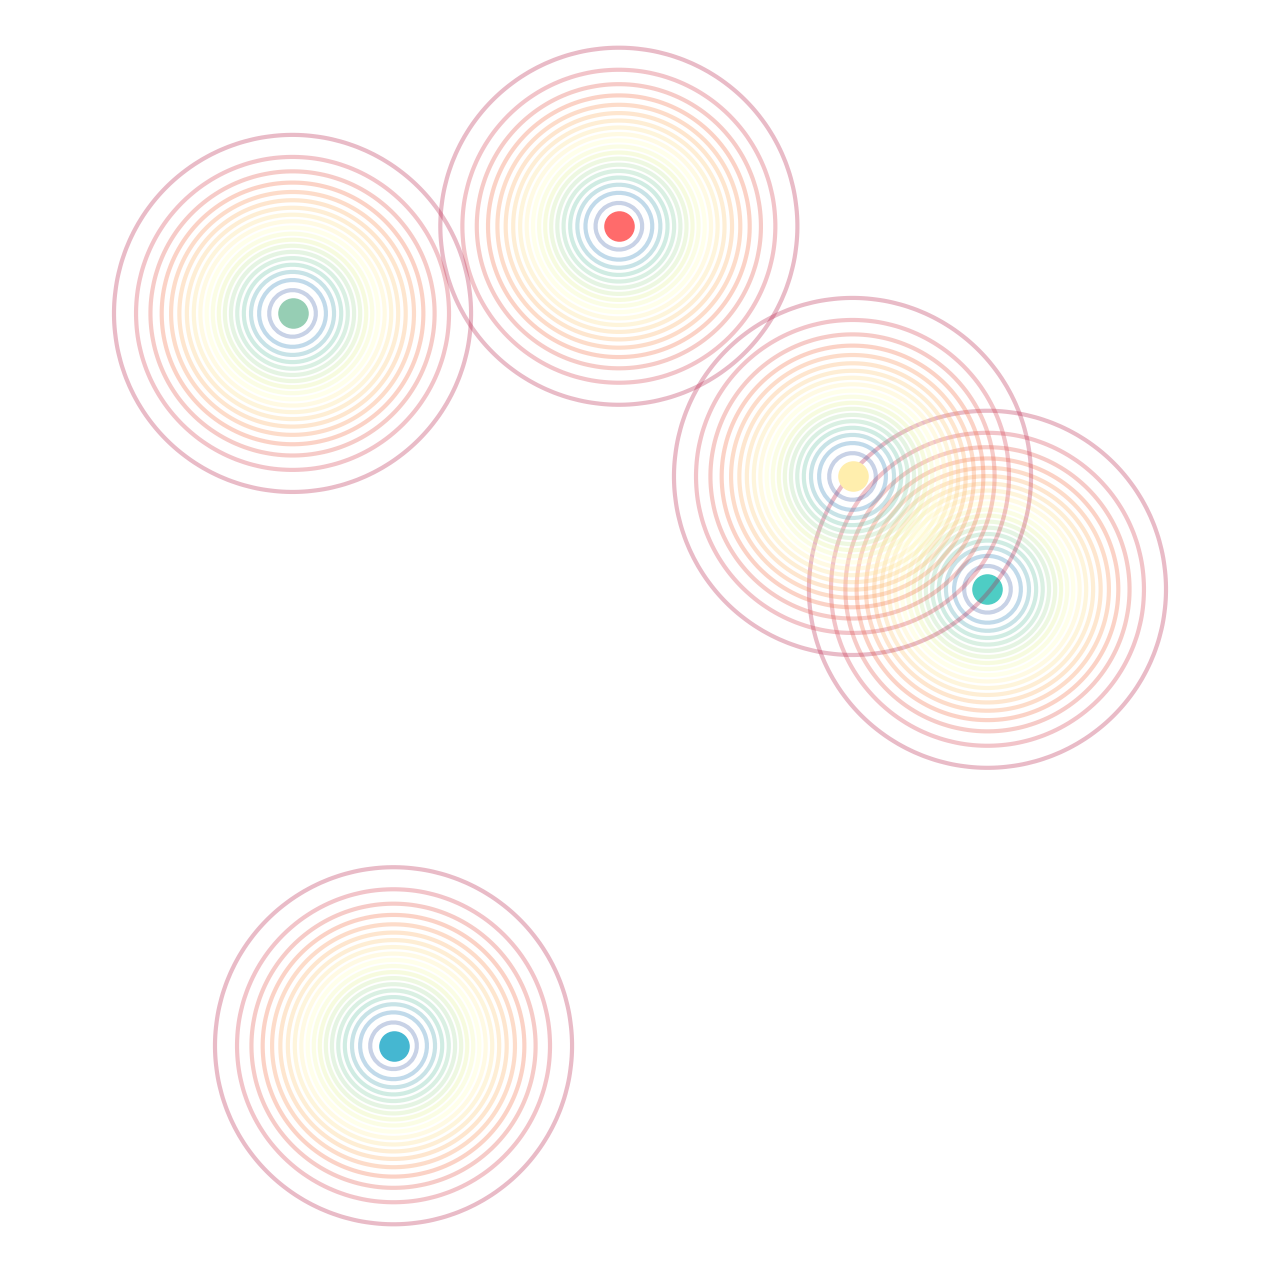

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 5 random points
np.random.seed(42)
points = np.random.rand(5, 2) * 10

# Create figure
plt.figure(figsize=(8,8))

# Plot each point with gaussian circle
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']
for (x,y), color in zip(points, colors):
    # Create gaussian weighted circle
    xx, yy = np.mgrid[x-2:x+2:100j, y-2:y+2:100j]
    pos = np.dstack((xx, yy))
    rv = np.exp(-((xx-x)**2 + (yy-y)**2))
    
    plt.contour(xx, yy, rv, levels=20, cmap=plt.cm.Spectral, alpha=0.3)
    plt.plot(x, y, 'o', color=color, markersize=10)

plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_frame_on(False)

plt.axis('equal')
plt.show()


In [27]:
from spaceoracle.plotting.shift import estimate_transition_probabilities
kotarget = 'IL21'
embedding = adata.obsm['X_umap']
n_neighbors = 150
betadata_path = tonsil.ko_path
perturbed_df = pd.read_parquet(
    f'{betadata_path}/{kotarget}_4n_maxx.parquet')
delta_X = perturbed_df.loc[
    tonsil.chart.adata.obs_names].values - tonsil.chart.adata.layers['imputed_count']
tonsil.chart.adata.layers[kotarget] = perturbed_df.loc[tonsil.chart.adata.obs_names].values.copy()
corr = tonsil.chart.get_corr(kotarget)

In [28]:
dz = adata[adata.obs.cell_type_2 == 'GC Dark Zone'].obs_names
lz = adata[adata.obs.cell_type_2 == 'GC Light Zone'].obs_names
tfh = adata[adata.obs.cell_type_2 == 'T_follicular_helper'].obs_names
naive = adata[adata.obs.cell_type_2 == 'Naive CD4 T'].obs_names
th1 = adata[adata.obs.cell_type_2 == 'Th1'].obs_names
th2 = adata[adata.obs.cell_type_2 == 'Th2'].obs_names


In [29]:
pd.DataFrame(
    corr, 
    index=tonsil.chart.adata.obs_names, 
    columns=tonsil.chart.adata.obs_names).loc[naive, tfh].mean().mean()

0.10032624020591116

In [30]:
pd.DataFrame(
    corr, 
    index=tonsil.chart.adata.obs_names, 
    columns=tonsil.chart.adata.obs_names).loc[naive, tfh].mean().mean()

0.10032624020591116

In [31]:
pd.DataFrame(
    corr, 
    index=tonsil.chart.adata.obs_names, 
    columns=tonsil.chart.adata.obs_names).loc[dz, lz].mean().mean()

0.017951687763788544

In [32]:
pd.DataFrame(
    corr, 
    index=tonsil.chart.adata.obs_names, 
    columns=tonsil.chart.adata.obs_names).loc[dz, dz]

NAME                AAACGAATCCGTCCTA-1  AAACGAATCTTTGGAG-1  \
NAME                                                         
AAACGAATCCGTCCTA-1            1.000000            0.030210   
AAACGAATCTTTGGAG-1           -0.023952            1.000000   
AAAGGTATCCAAACCA-1           -0.012284            0.019449   
AAAGTCCAGTTGGAGC-1           -0.025419            0.000558   
AAATGGACAGGGACTA-1           -0.030199           -0.023138   
...                                ...                 ...   
TTTGGAGAGTCCGTCG-1           -0.034405           -0.022369   
TTTGGAGGTGTACGCC-1           -0.000389            0.030914   
TTTGGTTCATGTGACT-1           -0.001314            0.031454   
TTTGTTGCAGGGACTA-1           -0.030598           -0.024888   
TTTGTTGGTACCACGC-1           -0.024246           -0.009675   

NAME                AAAGGTATCCAAACCA-1  AAAGTCCAGTTGGAGC-1  \
NAME                                                         
AAACGAATCCGTCCTA-1            0.014579            0.031975   
AAACGAATCTTTGGAG-1           -0.018197           -0.000549   
AAAGGTATCCAAACCA-1            1.000000            0.011358   
AAAGTCCAGTTGGAGC-1           -0.010656            1.000000   
AAATGGACAGGGACTA-1           -0.032310           -0.022641   
...                                ...                 ...   
TTTGGAGAGTCCGTCG-1           -0.023705           -0.024376   
TTTGGAGGTGTACGCC-1            0.017490            0.046231   
TTTGGTTCATGTGACT-1            0.013051            0.021495   
TTTGTTGCAGGGACTA-1           -0.041848           -0.017456   
TTTGTTGGTACCACGC-1           -0.034924           -0.009744   

NAME                AAATGGACAGGGACTA-1  AACAAGAAGAAAGTCT-1  \
NAME                                                         
AAACGAATCCGTCCTA-1            0.048273           -0.007339   
AAACGAATCTTTGGAG-1            0.029077           -0.019085   
AAAGGTATCCAAACCA-1            0.043067           -0.013716   
AAAGTCCAGTTGGAGC-1            0.028547           -0.024456   
AAATGGACAGGGACTA-1            1.000000           -0.026059   
...                                ...                 ...   
TTTGGAGAGTCCGTCG-1           -0.012343           -0.029658   
TTTGGAGGTGTACGCC-1            0.057122           -0.009769   
TTTGGTTCATGTGACT-1            0.041859           -0.005502   
TTTGTTGCAGGGACTA-1            0.008144           -0.025765   
TTTGTTGGTACCACGC-1            0.015676           -0.023455   

NAME                AACACACAGGGACACT-1  AACAGGGCATACAGCT-1  \
NAME                                                         
AAACGAATCCGTCCTA-1            0.046041            0.023088   
AAACGAATCTTTGGAG-1            0.023667            0.003344   
AAAGGTATCCAAACCA-1            0.038688            0.010460   
AAAGTCCAGTTGGAGC-1            0.026921            0.004558   
AAATGGACAGGGACTA-1           -0.000838           -0.005799   
...                                ...                 ...   
TTTGGAGAGTCCGTCG-1           -0.013147           -0.015925   
TTTGGAGGTGTACGCC-1            0.052649            0.026608   
TTTGGTTCATGTGACT-1            0.035993            0.015829   
TTTGTTGCAGGGACTA-1            0.007018           -0.004706   
TTTGTTGGTACCACGC-1            0.015212           -0.001324   

NAME                AACCAACTCTTCCTAA-1  AACCATGGTGGTATGG-1  ...  \
NAME                                                        ...   
AAACGAATCCGTCCTA-1            0.001102            0.040088  ...   
AAACGAATCTTTGGAG-1           -0.013915            0.015144  ...   
AAAGGTATCCAAACCA-1           -0.008168            0.026251  ...   
AAAGTCCAGTTGGAGC-1           -0.018463            0.020787  ...   
AAATGGACAGGGACTA-1           -0.022472           -0.013658  ...   
...                                ...                 ...  ...   
TTTGGAGAGTCCGTCG-1           -0.027247           -0.016516  ...   
TTTGGAGGTGTACGCC-1            0.000958            0.059531  ...   
TTTGGTTCATGTGACT-1           -0.000281            0.040561  ...   
TTTGTTGCAGGGACTA-1           -0.021

In [33]:
corr_null = tonsil.chart.compute_perturbation_corr(
    tonsil.chart.adata.to_df(layer='imputed_count'), 
    delta_X*0
)

In [34]:
source_ct = 'GC Dark Zone'
# transition_df = chart.compute_transitions(corr, source_ct=source_ct, annot='cell_type')
n_cells = tonsil.chart.adata.shape[0]
P = np.ones((n_cells, n_cells))
T = 0.05
np.fill_diagonal(P, 0)
P *= np.exp(corr / T)   
P /= P.sum(1)[:, None]

P_null = np.ones((n_cells, n_cells))
np.fill_diagonal(P_null, 0)
P_null *= np.exp(corr_null / T)   
P_null /= P_null.sum(1)[:, None]
P = P - P_null

In [35]:
pd.DataFrame(P[tonsil.chart.adata.obs['cell_type_2'] == source_ct])

0         1             2         3         4         5         6     \
0   -0.000070 -0.000035 -5.119849e-07 -0.000076 -0.000097  0.000127 -0.000075   
1   -0.000045 -0.000019 -2.538844e-05 -0.000056 -0.000074  0.000084 -0.000053   
2   -0.000051 -0.000021 -1.817030e-05 -0.000060 -0.000079  0.000088 -0.000058   
3   -0.000045 -0.000019 -2.513834e-05 -0.000056 -0.000075  0.000089 -0.000054   
4   -0.000032 -0.000014 -3.285615e-05 -0.000047 -0.000061  0.000063 -0.000043   
..        ...       ...           ...       ...       ...       ...       ...   
553 -0.000023 -0.000011 -3.904251e-05 -0.000043 -0.000057  0.000047 -0.000040   
554 -0.000065 -0.000030 -1.302181e-05 -0.000071 -0.000091  0.000112 -0.000069   
555 -0.000057 -0.000023 -6.723209e-06 -0.000063 -0.000082  0.000090 -0.000061   
556 -0.000035 -0.000014 -3.079379e-05 -0.000049 -0.000065  0.000067 -0.000046   
557 -0.000037 -0.000014 -2.571007e-05 -0.000050 -0.000067  0.000067 -0.000047   

         7         8         9     ...      4957      4958      4959  \
0    0.000212 -0.000088  0.000000  ...  0.000146 -0.000054 -0.000063   
1    0.000304 -0.000066 -0.000090  ...  0.000082 -0.000097 -0.000041   
2    0.000276 -0.000071 -0.000070  ...  0.000092 -0.000069 -0.000046   
3    0.000307 -0.000067 -0.000094  ...  0.000076 -0.000078 -0.000042   
4    0.000373 -0.000055 -0.000094  ...  0.000047 -0.000091 -0.000032   
..        ...       ...       ...  ...       ...       ...       ...   
553  0.000416 -0.000050 -0.000095  ...  0.000005 -0.000072 -0.000026   
554  0.000223 -0.000083 -0.000054  ...  0.000131 -0.000049 -0.000058   
555  0.000232 -0.000074 -0.000049  ...  0.000105  0.000000 -0.000050   
556  0.000362 -0.000058 -0.000096  ...  0.000046 -0.000090 -0.000033   
557  0.000345 -0.000059 -0.000085  ...  0.000051 -0.000080 -0.000035   

         4960      4961      4962      4963      4964      4965      4966  
0   -0.000064 -0.000082  0.000146 -0.000062  0.000085 -0.000075 -0.000084  
1   -0.000044 -0.000059  0.000116 -0.000042  0.000022 -0.000051 -0.000058  
2   -0.000048 -0.000064  0.000267 -0.000046  0.000189 -0.000057 -0.000065  
3   -0.000045 -0.000059  0.000066 -0.000042  0.000022 -0.000051 -0.000059  
4   -0.000036 -0.000046 -0.000032 -0.000033 -0.000053 -0.000039 -0.000045  
..        ...       ...       ...       ...       ...       ...       ...  
553 -0.000033 -0.000041 -0.000045 -0.000027 -0.000048 -0.000031 -0.000037  
554 -0.000059 -0.000076  0.000217 -0.000057  0.000171 -0.000070 -0.000078  
555 -0.000051 -0.000068  0.000131 -0.000050  0.000080 -0.000062 -0.000070  
556 -0.000038 -0.000049  0.000000 -0.000034 -0.000049 -0.000041 -0.000049  
557 -0.000039 -0.000051  0.000042 -0.000036  0.000000 -0.000044 -0.000051  

[558 rows x 4967 columns]

In [36]:
transition_df

NameError: name 'transition_df' is not defined

In [ ]:
transition_df[adata[adata.obs.cell_type_major == 'Germinal Center B cells'].obs_names]

In [ ]:
transition_df = pd.DataFrame(P[tonsil.chart.adata.obs['cell_type_2'] == source_ct])
transition_df.columns = tonsil.chart.adata.obs_names
transition_df.columns.name = source_ct

tonsil.chart.assess_transitions(
    transition_df, 
    base_celltypes=tonsil.chart.adata.obs.cell_type_2, 
    source_ct=source_ct,
    annot='cell_type_2'
)

In [ ]:
thresh = 0.000275
allowed_fates = ['GC Light Zone', 'GC Intermediate Zone', 'GC Dark Zone']
transitions = tonsil.chart.get_cellfate(transition_df, allowed_fates, thresh, annot='cell_type_2')

In [835]:
source_cells = tonsil.chart.adata.obs[tonsil.chart.adata.obs['cell_type_2'] == source_ct].index
tonsil.chart.adata.obs['transition'] = tonsil.chart.adata.obs['cell_type_2'].copy()
tonsil.chart.adata.obs.loc[source_cells, 'transition'] = np.array(transitions)

In [836]:
ct_points_wt, ct_points_ko = tonsil.chart.make_celltype_dict(annot='cell_type_2')

In [851]:
pts_wt_zone, _ = tonsil.chart.make_celltype_dict(annot='author_cell_type')

In [771]:
import scanpy as sc

In [837]:
import alphashape

In [862]:
pts = ct_points_ko

light_zone = alphashape.alphashape(pts['GC Light Zone'], alpha=0.035)
dark_zone = alphashape.alphashape(pts['GC Dark Zone'], alpha=0.035)
intermediate_zone = alphashape.alphashape(pts['GC Intermediate Zone'], alpha=0.035)

In [844]:
datadf = tonsil.chart.adata.obs[['cell_type_2', 'transition']].join(tonsil.xy)

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['figure.dpi'] = 200
ax = plt.gca()
for geom in light_zone.geoms:
    if geom.area > 5000:
        ax.fill(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color=color_dict['GC Light Zone'], alpha=0.5)
        
for geom in intermediate_zone.geoms:
    if geom.area > 5000:
        ax.fill(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color=color_dict['GC Intermediate Zone'], alpha=0.5)
        
for geom in dark_zone.geoms:
    if geom.area > 5000:
        ax.fill(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color=color_dict['GC Dark Zone'], alpha=0.5)
        
        
zone = alphashape.alphashape(pts_wt_zone['B_germinal_center'], alpha=0.035)
for geom in zone.geoms:
    if geom.area > 5000:
        ax.plot(
            geom.exterior.xy[0], 
            geom.exterior.xy[1], 
            color='black', alpha=1, linewidth=1)

sns.scatterplot(data=tonsil.xy, x='x', y='y', color='lightgrey', 
    palette=color_dict, alpha=0.5, s=10, legend=False, ax=ax, 
    linewidth=0.05, edgecolor='black'
)

sns.scatterplot(data=datadf, x='x', y='y', hue='transition', 
    palette=color_dict, alpha=1, s=10, legend=False, ax=ax, 
    linewidth=0.1, edgecolor='black'
)



ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

In [780]:
import alphashape

In [ ]:
light_zone
dark_zone

In [ ]:
import jscatter

scatter = jscatter.Scatter(
    x = adata.obsm['X_umap'][:, 0],
    y = adata.obsm['X_umap'][:, 1],
    color_by=adata.obs.cell_type_2.values
    
)

scatter.show()

In [630]:
# adata.obs.iloc[scatter.selection()].to_csv('GC_selection.csv')

In [ ]:
tonsil.load_betadata('FOXO1').mean(axis=0).sort_values(ascending=False)

In [ ]:
tonsil.init_gene_factory()

In [733]:
df = tonsil.gf.splash_betas(gene='BCL6')

In [ ]:
df.var().sort_values(ascending=False)

In [ ]:
ddf = df[['beta_KLF2']][tonsil.adata.obs.author_cell_type == 'B_germinal_center']
ddf[['beta_KLF2']] = ddf[['beta_KLF2']].mean()
ddf

In [ ]:
filtered_data = df[['beta_KLF2']][tonsil.adata.obs.author_cell_type == 'B_germinal_center']
sns.histplot(data=filtered_data)
plt.axvline(filtered_data['beta_KLF2'].mean(), color='red')


In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
plot_data = df[['beta_FOSL2']].join(tonsil.xy)[tonsil.adata.obs.author_cell_type == 'B_germinal_center']
scatter = plt.scatter(
    plot_data['x'],
    plot_data['y'], 
    c=[plot_data['beta_FOSL2'].mean()]*len(plot_data),
    cmap='rainbow'
)
plt.colorbar(scatter, shrink=0.5)
plt.xlabel('')
plt.ylabel('')

plt.gca().set_frame_on(False)
plt.xticks([])
plt.yticks([])
# plt.title('Spatial FOSL2')
# plt.tight_layout()
plt.show()

In [531]:
atmp = adata[~adata.obs.index.isin(adata.obs.iloc[[2250, 2593, 3255, 5281]].index)]
chart = Cartography(atmp[
    atmp.obs.cell_type_2.isin([
        'Naive CD4 T',
        'T_follicular_helper', 
        'Th2', 
        'Th1', 
        'Treg',
        'T_CD8',
    
        # 'T memory', 
        # 'GC Dark Zone',
        # 'GC Light Zone',
        # 'GC Intermediate Zone'
    ])], 
color_dict)

In [ ]:
perturb_target = 'BCL6'

perturbed_df = pd.read_parquet(
    f'/Volumes/SSD/genome_screens/human_tonsil/{perturb_target}_4n_0x.parquet')

grid_points, vector_field = chart.plot_umap_quiver(
    perturb_target=perturb_target,
    grid_scale=1,
    dpi=300,
    vector_scale=0.85,
    n_neighbors=70,
    figsize=(6, 6), 
    hue='cell_type_2',
    alpha=0.7,
    perturbed_df=perturbed_df,
    scatter_size=25,
    remove_null=True,
    curve=True,
    legend_on_loc=True,
    legend_fontsize=7,
    scale=4,
    grains=30,
    rename={
        'T_follicular_helper': 'T Follicular Helper',
        'T_CD8': 'T CD8+',
        'Naive CD4 T': 'T Naive CD4+',
    },
    highlight_clusters=[
        'Naive CD4 T',
        'T_follicular_helper', 
        # 'Th2', 
        # 'Th1', 
        # 'Treg',
        # 'T_CD8',
    ]
)

plt.show()

In [ ]:
# Convert grid_points to 2D grid format
x = np.unique(grid_points[:, 0])
y = np.unique(grid_points[:, 1])
X, Y = np.meshgrid(x, y)

u = np.unique(vector_field[:, 0])
v = np.unique(vector_field[:, 1])
U, V = np.meshgrid(u, v)
X.shape, Y.shape, U.shape, v.shape

In [ ]:
# Convert grid_points to 2D grid format
x = np.unique(grid_points[:, 0])
y = np.unique(grid_points[:, 1])
X, Y = np.meshgrid(x, y)

u = np.unique(vector_field[:, 0])
v = np.unique(vector_field[:, 1])
U, V = np.meshgrid(u, v)
X.shape, Y.shape, U.shape, v.shape

In [ ]:
# Convert grid_points to 2D grid format
x = np.unique(grid_points[:, 0])
y = np.unique(grid_points[:, 1])
X, Y = np.meshgrid(x, y)

u = np.unique(vector_field[:, 0])
v = np.unique(vector_field[:, 1])
U, V = np.meshgrid(u, v)
X.shape, Y.shape, U.shape, v.shape

In [ ]:
# Convert grid_points to 2D grid format
x = np.unique(grid_points[:, 0])
y = np.unique(grid_points[:, 1])
X, Y = np.meshgrid(x, y)

u = np.unique(vector_field[:, 0])
v = np.unique(vector_field[:, 1])
U, V = np.meshgrid(u, v)
X.shape, Y.shape, U.shape, v.shape

In [ ]:
# Convert grid_points to 2D grid format
x = np.unique(grid_points[:, 0])
y = np.unique(grid_points[:, 1])
X, Y = np.meshgrid(x, y)

u = np.unique(vector_field[:, 0])
v = np.unique(vector_field[:, 1])
U, V = np.meshgrid(u, v)
X.shape, Y.shape, U.shape, v.shape

In [ ]:
# Convert grid_points to 2D grid format
x = np.unique(grid_points[:, 0])
y = np.unique(grid_points[:, 1])
X, Y = np.meshgrid(x, y)

u = np.unique(vector_field[:, 0])
v = np.unique(vector_field[:, 1])
U, V = np.meshgrid(u, v)
X.shape, Y.shape, U.shape, v.shape

In [ ]:
# Convert grid_points to 2D grid format
x = np.unique(grid_points[:, 0])
y = np.unique(grid_points[:, 1])
X, Y = np.meshgrid(x, y)

u = np.unique(vector_field[:, 0])
v = np.unique(vector_field[:, 1])
U, V = np.meshgrid(u, v)
X.shape, Y.shape, U.shape, v.shape

In [ ]:
# Convert grid_points to 2D grid format
x = np.unique(grid_points[:, 0])
y = np.unique(grid_points[:, 1])
X, Y = np.meshgrid(x, y)

u = np.unique(vector_field[:, 0])
v = np.unique(vector_field[:, 1])
U, V = np.meshgrid(u, v)
X.shape, Y.shape, U.shape, v.shape

In [215]:
show = [
    'GC Dark Zone', 
    'GC Light Zone', 
    'GC Intermediate Zone', 
    'plasma', 
    'B_naive', 
    'B_memory', 
    'B_germinal_center', 
    'Naive CD4 T', 
    'Treg', 
    'T memory', 
    'Th1', 
    'Th2', 'T_CD8', 
    'T_CD4'
    'T_follicular_helper', 
    # 'mDC', 
    # 'FDC', 
    # 'myeloid', 
    # 'NK', 
    # 'pDC', 
    # 'T_double_neg'
]

In [187]:
ct_points_wt = {}
for ct in adata.obs['cell_type_major'].unique():
    points = np.asarray(
        adata[adata.obs['cell_type_major'] == ct].obsm['spatial'])
    delta = 30
    points = np.vstack(
        (points +[-delta,delta], points +[-delta,-delta], 
        points +[delta,delta], points +[delta,-delta]))
    ct_points_wt[ct] = points

In [ ]:
adata.obs.cell_type_2.value_counts()

In [ ]:
ax = chart.plot_umap(adata=chart.adata, 
    hue='cell_type_2', scatter_size=50, legend_on_loc=True, 
    color_dict=color_dict, basis='X_umap', alpha=1, 
    dpi=300, figsize=(7, 7), linewidth=0.2)

# alpha_shape = alphashape.alphashape(ct_points_wt['Germinal Center B cells'], alpha=0.035)

# for geom in alpha_shape.geoms:
#     # if geom.area > 10000:
#     #     ax.fill(
#     #         geom.exterior.xy[0], 
#     #         geom.exterior.xy[1], 
#     #         color='cyan', alpha=0.25)
        
#     if geom.area > 10000:
#         ax.plot(
#             geom.exterior.xy[0], 
#             geom.exterior.xy[1], 
#             color='black', alpha=1, linewidth=1.5, linestyle='--')

In [ ]:
adata

In [ ]:
import jscatter


x = adata.obsm['spatial'][:, 0]
y = adata.obsm['spatial'][:, 1]
c = adata.obs['cell_type_2'].values

scatter = jscatter.Scatter(x, y, color_by=c, height=600, width=600, legend=True)
scatter.show()

In [ ]:
scatter.selection()

In [ ]:
scatter.selection()